In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
#read data
result = np.load("result.npy").item()

In [3]:
#define function for plotting
def plot_result(result, conditions, compare_items_num, dotted_line = True, Taiwan50 = True):
    #plt.figure(figsize = (16, 8))
    for keys in result.keys():
        conditions_counter = []
        for condition in conditions:
            if condition in keys.split("_"):
                conditions_counter.append(1)
        if sum(conditions_counter) == compare_items_num:
            temp_plot = pd.DataFrame(result['{}'.format(keys)]).iloc[:, 0]
            temp_plot.index = np.arange(5, 105, 5)
            plt.plot(temp_plot, label = keys, marker = ".", ms = 10)
            
    if Taiwan50 == True:
        plt.plot(np.arange(5, 105, 5), [result["0050"][0]] * 20, ls= ":", c = "black", alpha = 0.8, label  = "Taiwan50")
            
    if dotted_line == True:
        plt.plot(np.arange(5, 105, 5), [100] * 20, ls= "--", c = "grey", alpha = 0.8, label = "Initial Capital")
        
    plt.xlabel("Number of stocks selected each year", fontsize = 12)
    plt.ylabel("Remain capital (initial capital = 100 NTD)", fontsize = 12)
    plt.legend();

## All Result

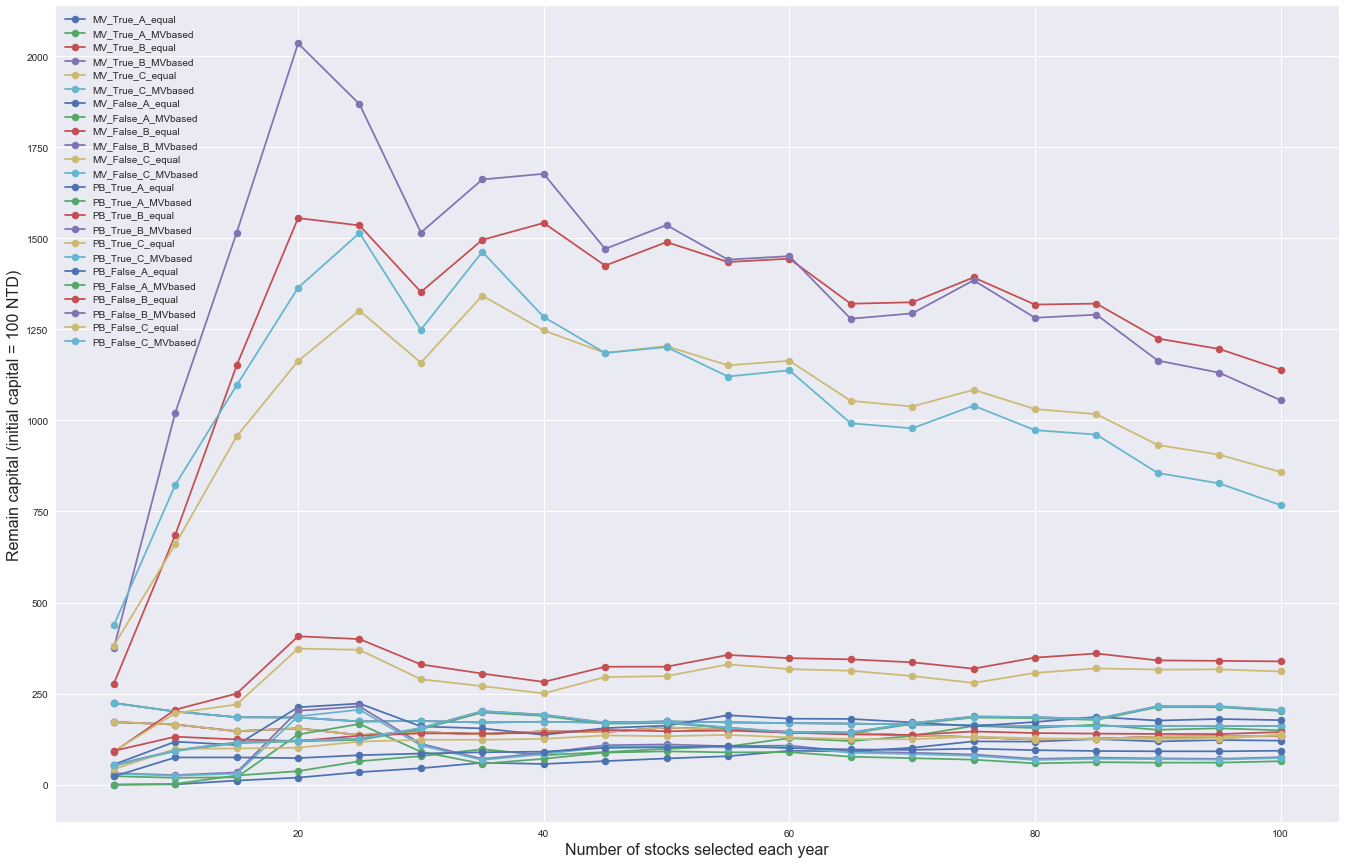

In [4]:
#plot 24 result in all combination of parameters according to different number of stock selected in each year
plt.figure(figsize = (23, 15))

for keys in result.keys():
    temp = pd.DataFrame(result['{}'.format(keys)]).iloc[:, 0]
    try:
        temp.index = np.arange(5, 105, 5)
        plt.plot(temp, label = keys, marker = ".", ms = 15)
    #when loop through ETF, it will jump to except
    except:
        pass

plt.xlabel("Number of stocks selected each year", fontsize = 16)
plt.ylabel("Remain capital (initial capital = 100 NTD)", fontsize = 16)
plt.legend();

## In this section, we will discuss how these parameter affect return:
1. **"by"** : select stocks by MV(Market Value) or by PB(Price to Book ratio).
2. **"ascending"** : select stocks according to "by", in ascending(select smallest) or descending(select biggest) way.
3. **"trade_mode"** : 3 trade modes, "A", "B", "C" are provided. During backtesting if certain stock don't meet the requirement of least trade volume, then code itself will set exit price to different value according to appointed trade mode. Exit price will be set = 0, = entry price, = price at exit point(regardless of low liquidity) sequentially in "A", "B", "C" mode.
4. **"weight_mode"** : how the selected stocks form a portfolio, "equally weighted", and "market value based" two ways are provided.

#### All possible parameters combination for  *small marlet value and small PB ratio companies* in loose trade mode ("B", "C" mode)

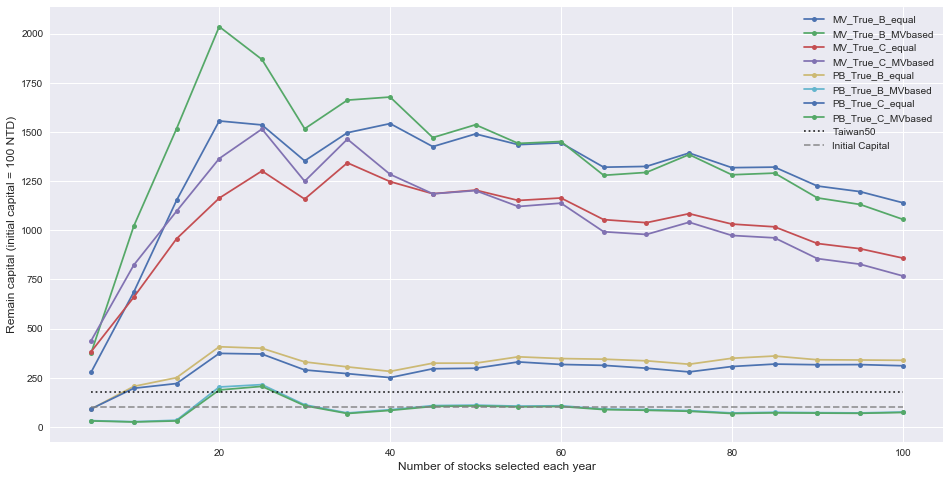

In [5]:
plt.figure(figsize = (16, 8))
plot_result(result, ["MV", "PB", "True", "B", "C", "equal", "MVbased"], 4)

#### All possible parameters combination for *big marlet value and small PB ratio companies* in loose trade mode ("B", "C" mode)

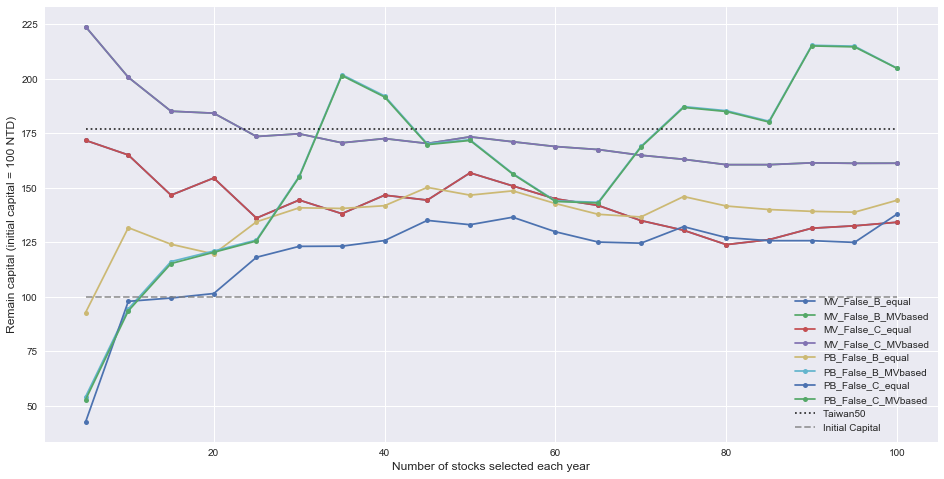

In [6]:
plt.figure(figsize = (16, 8))
plot_result(result, ["MV", "PB", "False", "B", "C", "equal", "MVbased"], 4)

**It's more clear to plot in this way:**

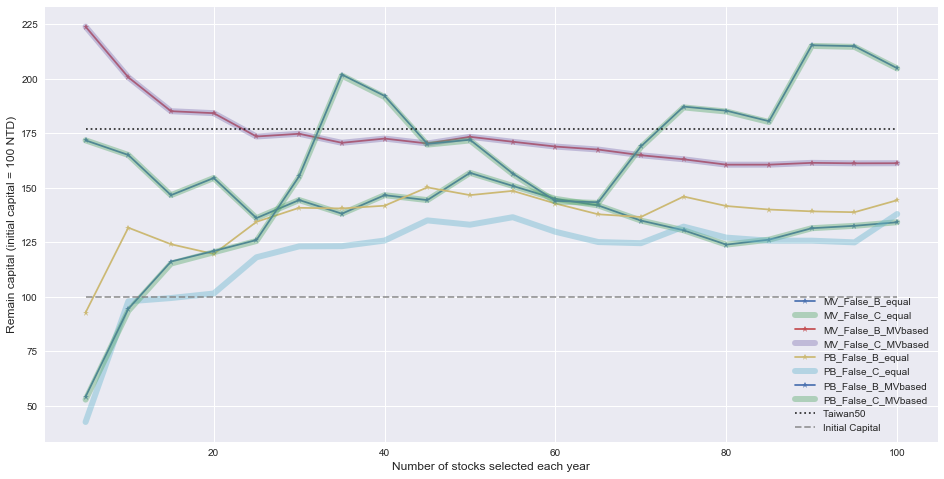

In [7]:
plt.figure(figsize = (16, 8))
plt.plot(pd.DataFrame(result["MV_False_B_equal"], index = np.arange(5, 105, 5)).iloc[:, 0], marker = "*" , label = "MV_False_B_equal")
plt.plot(pd.DataFrame(result["MV_False_C_equal"], index = np.arange(5, 105, 5)).iloc[:, 0], lw = 6, alpha = 0.4, label = "MV_False_C_equal")
plt.plot(pd.DataFrame(result["MV_False_B_MVbased"], index = np.arange(5, 105, 5)).iloc[:, 0], marker = "*" , label = "MV_False_B_MVbased")
plt.plot(pd.DataFrame(result["MV_False_C_MVbased"], index = np.arange(5, 105, 5)).iloc[:, 0], lw = 6, alpha = 0.4, label = "MV_False_C_MVbased")
plt.plot(pd.DataFrame(result["PB_False_B_equal"], index = np.arange(5, 105, 5)).iloc[:, 0], marker = "*" , label = "PB_False_B_equal")
plt.plot(pd.DataFrame(result["PB_False_C_equal"], index = np.arange(5, 105, 5)).iloc[:, 0], lw = 6, alpha = 0.4, label = "PB_False_C_equal")
plt.plot(pd.DataFrame(result["PB_False_B_MVbased"], index = np.arange(5, 105, 5)).iloc[:, 0], marker = "*" , label = "PB_False_B_MVbased")
plt.plot(pd.DataFrame(result["PB_False_C_MVbased"], index = np.arange(5, 105, 5)).iloc[:, 0], lw = 6, alpha = 0.4, label = "PB_False_C_MVbased")

plt.plot(np.arange(5, 105, 5), [result["0050"][0]] * 20, ls= ":", c = "black", alpha = 0.8, label  = "Taiwan50")
plt.plot(np.arange(5, 105, 5), [100] * 20, ls= "--", c = "grey", alpha = 0.8, label = "Initial Capital")
plt.xlabel("Number of stocks selected each year", fontsize = 12)
plt.ylabel("Remain capital (initial capital = 100 NTD)", fontsize = 12)
plt.legend();

#### Portfolios selected by market value (given "trade_mode" = "A")

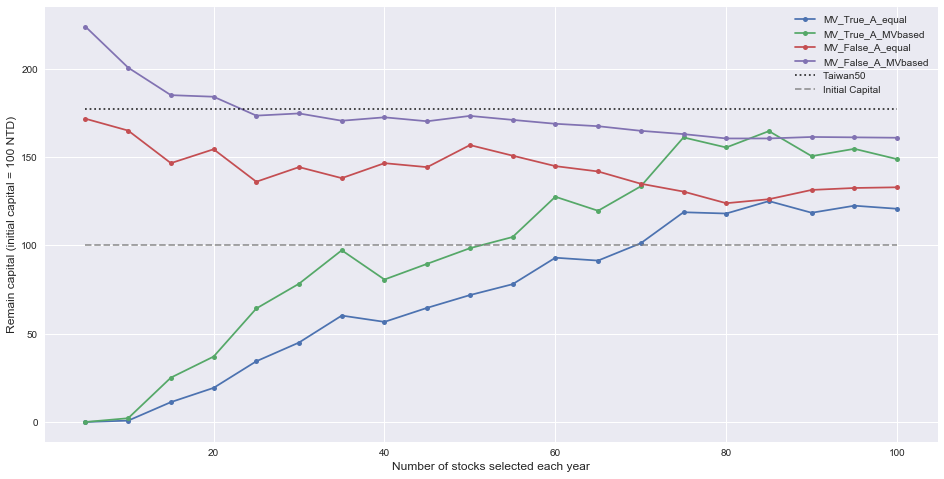

In [8]:
plt.figure(figsize = (16, 8))

plot_result(result, ["MV", "False","True" , "A", "equal", "MVbased"], 4)

#### Portfolios selected by price-tp-book ratio (given "trade_mode" = "A")

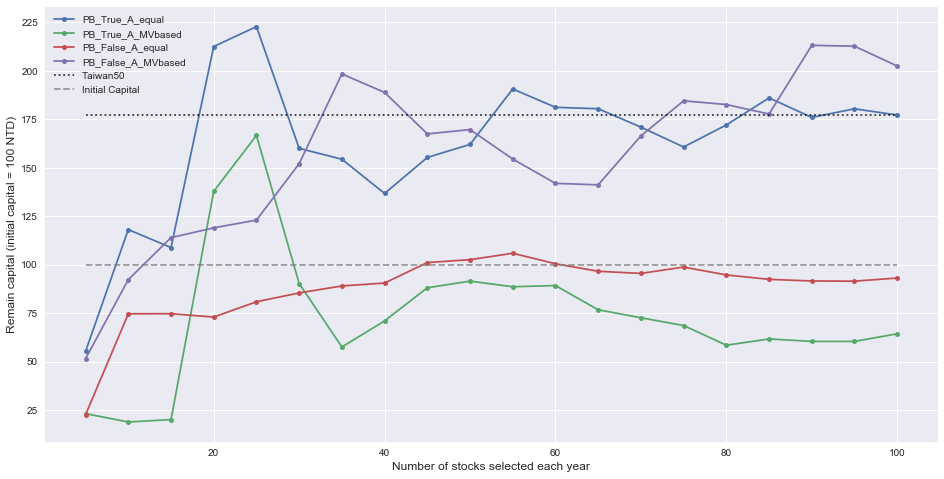

In [9]:
plt.figure(figsize = (16, 8))

plot_result(result, ["PB", "False","True" , "A", "equal", "MVbased"], 4)